In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.utils import np_utils
from keras.layers import Dense,Activation,Flatten,Conv2D,Dropout,MaxPooling2D
from keras.models import Sequential
from keras import regularizers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import os
import cv2

In [11]:
datadir ='/users/yajashkadian/Downloads/Face_image_dataset'

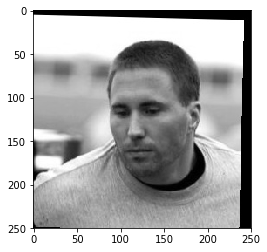

In [13]:
for img in os.listdir(datadir):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(datadir,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break 

In [14]:
print(img_array)


[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [10  0 40 ...  0  0  0]
 [ 9  0 28 ...  0  0  0]
 [ 2  0  0 ...  0  0  0]]


In [15]:
print(img_array.shape)

(250, 250)


AttributeError: 'str' object has no attribute 'shape'

In [16]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(60,60,3)))

model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))

model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))

model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='softmax'))


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 58, 58, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 27, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 128)         147584    
__________

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
             metrics=['accuracy'])

W0704 13:24:23.493744 4513084864 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0704 13:24:23.533859 4513084864 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [19]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
                datadir,
                target_size=(60,60),
                batch_size=20,
                class_mode='binary')
test_generator=test_datagen.flow_from_directory(
                test_dir,
                target_size=(60,60),
                batch_size=20,
                class_mode='binary'
                )

NameError: name 'train_dir' is not defined

In [10]:
history=model.fit_generator(train_generator,
                            steps_per_epoch=100,
                            epochs=5,
                            validation_data=test_generator,
                            validation_steps=50)

NameError: name 'train_generator' is not defined